In [30]:
import numpy as np
import pandas as pd

In [31]:
data=pd.read_csv("sales.csv")
data

,Age,Income,Gender,MaritialStatus,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Female,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [32]:
data.describe()

,Age,Income,Gender,MaritialStatus,Buys
count,14,14,14,14,14
unique,3,3,2,2,2
top,<21,Medium,Female,Married,Yes
freq,5,6,8,7,9


In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder();
#data=data.apply(le.fit_transform)
data
x=data.iloc[:,:-1]
x=x.apply(le.fit_transform)

In [34]:

y=data.iloc[:,-1]

In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=10)
classifier.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [36]:
#Predict value for the given Expression
#[Age < 21, Income = Low,Gender = Female, Marital Status = Married]
test_x=np.array([1,1,0,0])
pred_y=classifier.predict([test_x])
print("Predicted class for input", test_x," is ",pred_y[0])

Predicted class for input [1 1 0 0]  is  Yes


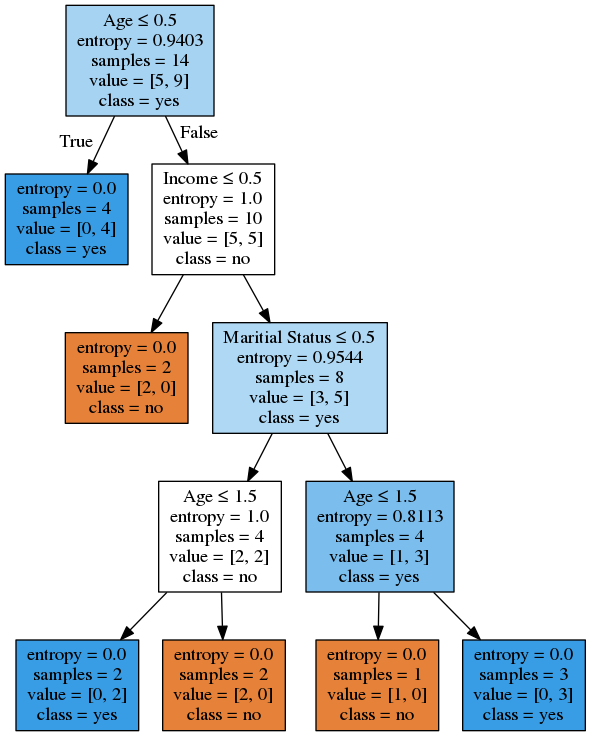

In [37]:
#method 3
import pydotplus as pdd
from IPython.display import Image
dot_data = export_graphviz(classifier, out_file=None,feature_names=['Age','Income','Gender','Maritial Status'],class_names=['no', 'yes'], filled = True,special_characters=True)

graph = pdd.graph_from_dot_data(dot_data)  

#Image(graph.create_png())
#graph.write_png("dtree.png")
Image(graph.create_png())

In [38]:
#run below command to install graphviz
# !pip install graphviz